# EDA
In this notebook, I will take a look at general distribution and simple descriptive stats of the data.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

import pickle

import os


In [3]:
artdf = pd.read_pickle('PkL/merged_artworks_recent.pkl')

## Counts
Total counts of data from each data set

In [21]:
n_flickr = len(os.listdir('IMAGES/Flicker/Flicker8k_Dataset/'))
n_art = len(artdf)

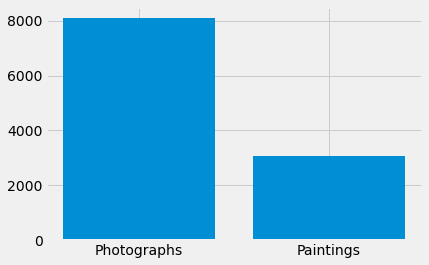

In [25]:
plt.bar(['Photographs', 'Paintings'], [n_flickr, n_art])
plt.show()

We had over 8000 photos with captions from Flickr dataset provided by Machine Learning Mastery and Illinois State University. And over 3000 paintings collected from three museum APIs.

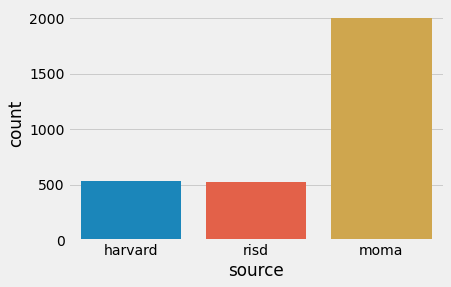

In [32]:
sns.countplot(x = 'source', data = artdf)
plt.show()

Out of the 3, most images were from the Museum of Modern Art. Over 500 images from Harvard Museum and Rhode Island School of Design were also collected.

## Text Data
---
Now let's look at what text data shows.

### Flickr Photo Descriptions

In [92]:
from itertools import chain
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [34]:
# loading text
with open('PKL/descriptions.pkl', 'rb') as fp:
        descriptions = pickle.load(fp)

In [90]:
descriptions = list(chain.from_iterable(descriptions.values()))

In [60]:
# combine all
desc = ' '.join(descriptions)

In [67]:
# remove stopwords & lemmatize

sw = stopwords.words('english')
sw += ['seqini', 'seqfin']
wnl = WordNetLemmatizer()

In [68]:
clean_desc = [wnl.lemmatize(x) for x in desc.split() if x not in sw]

In [72]:
# count word frequencies
desc_count = Counter(clean_desc)

In [85]:
top20 = {x[0]: x[1] for x in desc_count.most_common(20)}

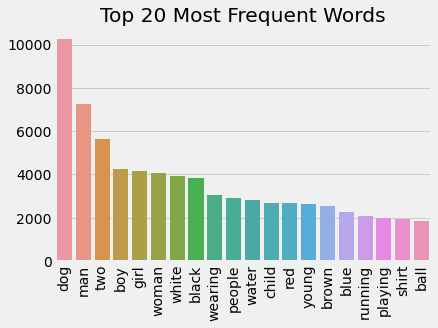

In [87]:
g = sns.barplot(list(top20.keys()), list(top20.values()))
g.set(title = 'Top 20 Most Frequent Words')
plt.xticks(rotation = 90)
plt.show()

It seems like this dataset contains pretty standard sentences and images with a limited set of words.